In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

## defining helper methods

In [2]:
#single step bulk and bound return the coefficient by which to multiply dx for change in x and l in simulation (return +/- 1 or 0)
def single_step_bulk(delt,lam,bet):
  choose = np.random.choice([-1,0,1],p=[delt/(delt+lam+bet),bet/(delt+lam+bet),lam/(delt+lam+bet)])
  xDisp = choose
  lDisp = abs(choose) - 1
  rDisp = -1 * lDisp
  return xDisp, lDisp, rDisp

def single_step_bound(gam,lam):
  choose = np.random.choice([0,1], p=[gam/(gam+lam),lam/(gam+lam)])
  xDisp = choose
  lDisp = 1 - choose
  rDisp = -1 * lDisp
  return xDisp, lDisp, rDisp

#combine for a single trial
def single_trial(x0,dx,R,b,delt,lam,bet,gam,epsilon,l0=0,output=False):
  currX = x0
  currL = l0
  currR = R - currL

  currDelta = delt(currX,currL,currR,dx,epsilon)
  currLambda = lam(currX,currL,currR,dx,epsilon)
  currBeta = bet(currX,currL,currR,dx,epsilon)
  currGamma = gam(currX,currL,currR,dx,epsilon)

  reachedR = -1

  while_counter = 0
  while(currX < b and (currL < R or currX > 0)):
    while_counter += 1
    #reevaluating rates based on whatever functions they are (defined I'm assuming in terms of some combination of x, l, and r)
    currDelta = delt(currX,currL,currR,dx,epsilon)
    currLambda = lam(currX,currL,currR,dx,epsilon)
    currBeta = bet(currX,currL,currR,dx,epsilon)
    currGamma = gam(currX,currL,currR,dx,epsilon)
    #taking a step!
    if(currX > 0):
      xDisp,lDisp,rDisp = single_step_bulk(currDelta,currLambda,currBeta)
      currX += xDisp * dx
      currL += lDisp * dx
      currR = R - currL
    elif(currX <= 0):
      currX = 0
      currGamma = gam(currX,currL,currR,dx,epsilon)
      currLambda = lam(currX,currL,currR,dx,epsilon)
      xDisp,lDisp,rDisp = single_step_bound(currGamma,currLambda)
      currX += xDisp * dx
      currL += lDisp * dx
      currR = R - currL
    else:
      if(output):
        print("edge case: exiting after " + str(while_counter) + " iterations")
    #print(currL)

  if(output):
    print("success! exiting after " + str(while_counter) + " iterations")

  if(currX >= b):
    reachedR = 0
  elif(currL >= R or currR <= 0):
    reachedR = 1

  return reachedR


In [3]:
#defining an unbiased walk to start
#setting dt = 1 (can i do that?)
def lambdaa(x,l,r,dx,epsilon):
  return (r+epsilon)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r+epsilon)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return 1/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

epsilon = 1
single_trial(.3,.1,1,50,deltaa,lambdaa,betaa,gammaa,epsilon,l0 = 1,output=True)

success! exiting after 193 iterations


1

## seems like it works for a single simulation! now to calculate simulated probability

In [4]:
#monte carlo
def get_prob_number(num_trials,x0,dx,R,b,delt,lam,bet,gam,epsilon,l00=0,outputt=False):
  total = 0
  for i in range(num_trials):
    total += single_trial(x0,dx,R,b,delt,lam,bet,gam,epsilon,l0=l00,output=outputt)
  return total/float(num_trials)

## trials

In [6]:
#n = -2, m = -2
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.empty((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return 1/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0


In [7]:
PROBS[0][1]

0.56

In [8]:
#writing to csv, rows are r, columns are x
import csv
with open('/home/jenny/tms-neuronavigation/random_walk_results/n-2m-2.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

In [9]:
#n = -1, m = -2
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return r/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

with open('/home/jenny/tms-neuronavigation/random_walk_results/n-1m-2.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.36


In [10]:
#n = 0, m = -2
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.empty((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n0m-2.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.48


In [5]:
#n = 1, m = -2
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (r**3)/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n1m-2.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.0


In [5]:
#n = 2, m = -2
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r**2)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (r**4)/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n2m-2.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.0


In [7]:
#n = -2, m = -1
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return 1/(r*(dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n-2m-1.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5


/tmp/ipykernel_1013850/3420909057.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(r*(dx**2))


r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.56


In [6]:
#n = -1, m = -1
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return 1/((dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n-1m-1.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.44


In [10]:
#n = 0, m = -1
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return r/((dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n0m-1.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.32


In [11]:
#n = 1, m = -1
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (r**2)/((dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n1m-1.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.08


In [5]:
#n = 2, m = -1
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (r**3)/((dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n2m-1.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.0


In [8]:
#n = -2, m = 0
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (1)/((r**2)*(dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n-2m0.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5


/tmp/ipykernel_1027989/3731730956.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return (1)/((r**2)*(dx**2))


r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.64


In [9]:
#n = -1, m = 0
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (1)/((r)*(dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n-1m0.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5


/tmp/ipykernel_1027989/457662773.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return (1)/((r)*(dx**2))


r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.72


In [10]:
#n = 0, m = 0
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (1)/((dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n0m0.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.36


In [11]:
#n = 1, m = 0
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (r)/((dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n1m0.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.2


In [12]:
#n = 2, m = 0
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (1)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return (r**2)/((dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n2m0.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0
0.12


In [5]:
#n = -2, m = 1
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0.01,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.zeros((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (1)/(r*(dx**2))

def deltaa(x,l,r,dx,epsilon):
  return (1)/(r*(dx**2))

def gammaa(x,l,r,dx,epsilon):
  return 1/((r**3)*(dx**2))

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)
  
print(PROBS[0][1])

import csv 
with open('/home/jenny/tms-neuronavigation/random_walk_results/n-2m1.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.01  x: 0.0
r: 0.01  x: 0.5


In [25]:
import pandas as pd

PROBSDF = pd.DataFrame(PROBS, index=trialR, columns=trialX)
PROBSDF.to_csv("PROBSDF2.csv")

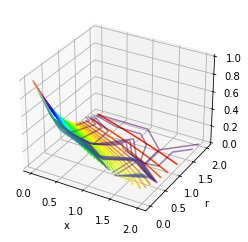

0.7261490370736909


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def P(lam,x,r):
    return np.exp(-np.sqrt(lam)*((r**2)/2 + r*epsilon)) * np.exp(-np.sqrt(lam)*x)


lamm = 1
x = np.linspace(0, 2, 100)
r = np.linspace(0, 2,200)

X, R = np.meshgrid(x, r)
Z = np.empty((200,100))
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = P(lamm,x[j],r[i])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, R, Z, 50, cmap=cm.hsv)
ax.contour3D(trialX,trialR,PROBS,50,cmap=cm.viridis,alpha=.5)
ax.set_xlabel('x')
ax.set_ylabel('r')
ax.set_zlabel('Pi')
#ax.set_title('L(l,x) 2D case, a = 5, b = 20, r = 5')
plt.show()


print(P(lamm,.1,.2))